## Importing Libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [190]:
cars=pd.read_csv('car_price_new.csv')

In [191]:
cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,55091,2008,Chevrolet,Tahoe,LS,SUV,automatic,1gnfc13c38j114097,tn,2.0,100335.0,blue,black,consolidated asset recovery systems inc.,13500.0,8000.0,Tue Dec 23 2014 10:00:00 GMT-0800 (PST)
1,374745,2011,Infiniti,G Sedan,G37x,G Sedan,automatic,jn1cv6ar3bm411941,tn,43.0,36724.0,black,—,nissan infiniti lt,17950.0,18000.0,Wed Mar 04 2015 02:30:00 GMT-0800 (PST)
2,475793,2012,Toyota,RAV4,Base,suv,automatic,2t3bf4dv0cw239620,oh,26.0,22142.0,blue,gray,toyota financial services,15450.0,14600.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
3,456668,2014,Dodge,Avenger,SE,Sedan,automatic,1c3cdzab1en138859,mn,45.0,11893.0,blue,black,capital one auto finance,12200.0,13500.0,Wed May 27 2015 03:30:00 GMT-0700 (PDT)
4,386470,2011,Ford,Focus,SEL,Sedan,automatic,1fahp3hn9bw194095,nc,47.0,72731.0,gray,gray,parkway ford lincoln,8025.0,8600.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST)


In [192]:
cars.shape

(55884, 17)

In [193]:
cars.columns

Index(['Unnamed: 0', 'year', 'make', 'model', 'trim', 'body', 'transmission',
       'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'],
      dtype='object')

In [194]:
cars.drop(['Unnamed: 0','vin'],axis=1,inplace=True)

In [195]:
cars.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2008,Chevrolet,Tahoe,LS,SUV,automatic,tn,2.0,100335.0,blue,black,consolidated asset recovery systems inc.,13500.0,8000.0,Tue Dec 23 2014 10:00:00 GMT-0800 (PST)
1,2011,Infiniti,G Sedan,G37x,G Sedan,automatic,tn,43.0,36724.0,black,—,nissan infiniti lt,17950.0,18000.0,Wed Mar 04 2015 02:30:00 GMT-0800 (PST)
2,2012,Toyota,RAV4,Base,suv,automatic,oh,26.0,22142.0,blue,gray,toyota financial services,15450.0,14600.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
3,2014,Dodge,Avenger,SE,Sedan,automatic,mn,45.0,11893.0,blue,black,capital one auto finance,12200.0,13500.0,Wed May 27 2015 03:30:00 GMT-0700 (PDT)
4,2011,Ford,Focus,SEL,Sedan,automatic,nc,47.0,72731.0,gray,gray,parkway ford lincoln,8025.0,8600.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST)


In [196]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55884 entries, 0 to 55883
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          55884 non-null  int64  
 1   make          54875 non-null  object 
 2   model         54867 non-null  object 
 3   trim          54833 non-null  object 
 4   body          54591 non-null  object 
 5   transmission  49293 non-null  object 
 6   state         55884 non-null  object 
 7   condition     54733 non-null  float64
 8   odometer      55875 non-null  float64
 9   color         55798 non-null  object 
 10  interior      55798 non-null  object 
 11  seller        55884 non-null  object 
 12  mmr           55880 non-null  float64
 13  sellingprice  55883 non-null  float64
 14  saledate      55883 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 6.4+ MB


In [197]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,55884.000000,54733.000000,55875.000000,55880.000000,55883.000000
mean,2010.030903,30.664371,68343.936662,13755.078740,13592.437700
std,3.975043,13.384400,52874.009718,9675.907326,9732.192721
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28496.500000,7125.000000,6900.000000
50%,2012.000000,35.000000,52635.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99072.500000,18350.000000,18200.000000
max,2015.000000,49.000000,999999.000000,172000.000000,160000.000000


## Missing Values

In [198]:
cars.isnull().mean()*100

year             0.000000
make             1.805526
model            1.819841
trim             1.880681
body             2.313721
transmission    11.794073
state            0.000000
condition        2.059624
odometer         0.016105
color            0.153890
interior         0.153890
seller           0.000000
mmr              0.007158
sellingprice     0.001789
saledate         0.001789
dtype: float64

In [199]:
for i in cars.columns:
    if cars[i].isnull().mean()*100<2 and cars[i].isnull().mean()*100>0:
        cars.dropna(subset=[i],inplace=True)
cars.isnull().mean()*100

year             0.000000
make             0.000000
model            0.000000
trim             0.000000
body             0.000000
transmission    11.674559
state            0.000000
condition        1.989502
odometer         0.000000
color            0.000000
interior         0.000000
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [200]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54486 entries, 0 to 55883
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          54486 non-null  int64  
 1   make          54486 non-null  object 
 2   model         54486 non-null  object 
 3   trim          54486 non-null  object 
 4   body          54486 non-null  object 
 5   transmission  48125 non-null  object 
 6   state         54486 non-null  object 
 7   condition     53402 non-null  float64
 8   odometer      54486 non-null  float64
 9   color         54486 non-null  object 
 10  interior      54486 non-null  object 
 11  seller        54486 non-null  object 
 12  mmr           54486 non-null  float64
 13  sellingprice  54486 non-null  float64
 14  saledate      54486 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 6.7+ MB


In [201]:
# Calculating the mode of the 'transmission' column
mode_transmission = cars['transmission'].mode()[0]

# Filling the missing values with the mode
cars['transmission'].fillna(mode_transmission, inplace=True)

In [202]:
# Calculating the mean of the 'condition' column
mean_condition = cars['condition'].mean()

# Filling the missing values with the mean
cars['condition'].fillna(mean_condition, inplace=True)


In [203]:
cars.isnull().mean()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [204]:
cars.duplicated().sum()

0

In [205]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,54486.000000,54486.000000,54486.000000,54486.000000,54486.000000
mean,2010.132511,30.778510,67359.057519,13860.400837,13695.201263
std,3.892261,13.219957,52305.412339,9614.919464,9672.638351
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28202.000000,7350.000000,7100.000000
50%,2012.000000,34.000000,51630.000000,12350.000000,12200.000000
75%,2013.000000,41.000000,97564.750000,18450.000000,18300.000000
max,2015.000000,49.000000,999999.000000,172000.000000,160000.000000


In [206]:
cars['saledate'] = pd.to_datetime(cars['saledate'],utc=True)
cars['sale_year'] = cars['saledate'].dt.year
cars['sale_month'] = cars['saledate'].dt.month
cars['sale_day'] = cars['saledate'].dt.day
cars['day_of_week'] = cars['saledate'].dt.day_name()
cars.drop(columns=['saledate'], inplace=True)

C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\1212607466.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cars['saledate'] = pd.to_datetime(cars['saledate'],utc=True)


In [207]:
err=cars[cars['year']>cars['sale_year']]
cars.drop(err.index,inplace=True)

In [208]:
cars['color'].replace('—', 'Unknown',inplace=True)
cars['interior'].replace('—', 'Unknown',inplace=True)

In [209]:
cars['body'] = cars['body'].str.lower()

In [210]:
cars.nunique()

year               26
make               50
model             663
trim             1109
body               40
transmission        2
state              38
condition          42
odometer        44962
color              20
interior           17
seller           5514
mmr              1033
sellingprice      966
sale_year           2
sale_month          8
sale_day           31
day_of_week         6
dtype: int64

## Univariate Analysis

C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sellingprice', ylabel='Count'>

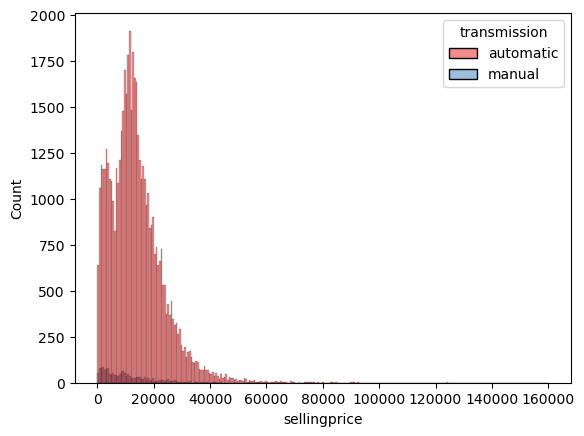

In [211]:
sns.histplot(x='sellingprice',data=cars,hue='transmission',palette='Set1')

The highest selling cars are between 10000 to 20000 USD

<Axes: xlabel='body', ylabel='count'>

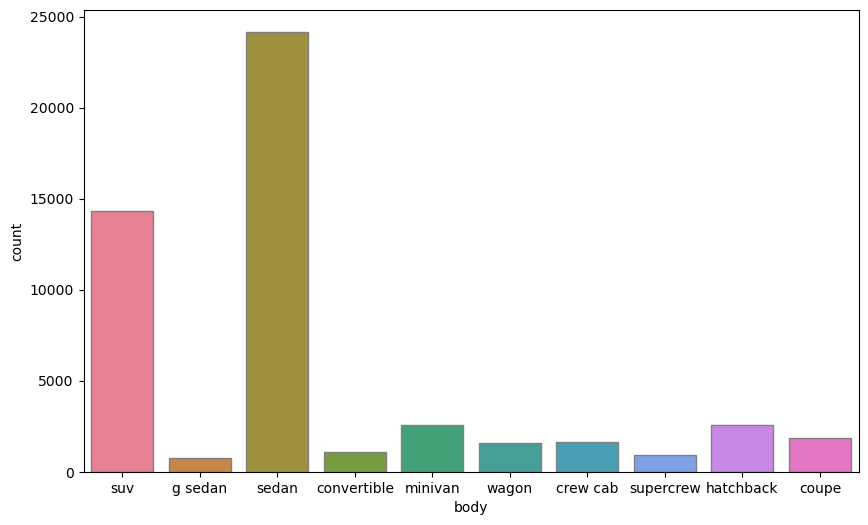

In [212]:
# Get top 10 categories for 'body'
top_10_bodies = cars['body'].value_counts().head(10).index

# Filter data to include only top 10 categories
cars_top_10 = cars[cars['body'].isin(top_10_bodies)]

# Plotting with seaborn countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='body', data=cars_top_10, palette='husl', edgecolor='gray')

Off all the body type Sedan is the first choice for many while SUV being the second favorite.

Text(0.5, 1.0, 'Number of Cars Sold Each Year')

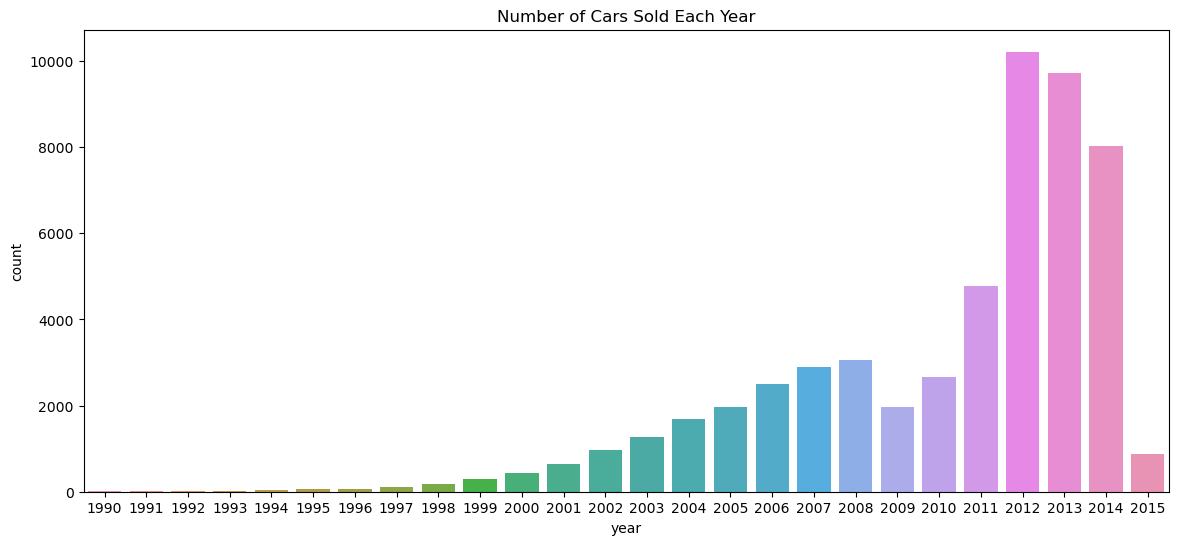

In [213]:
plt.figure(figsize=(14, 6))
sns.countplot(x='year',data=cars)
plt.title('Number of Cars Sold Each Year')

The sale of the car increased with year, i.e., Cars became, more popular in the 21st Century.

There's a clear drop in the sales of the cars in the years 2009 and 2010. The economic crisis of 2008 can be one of the main reason

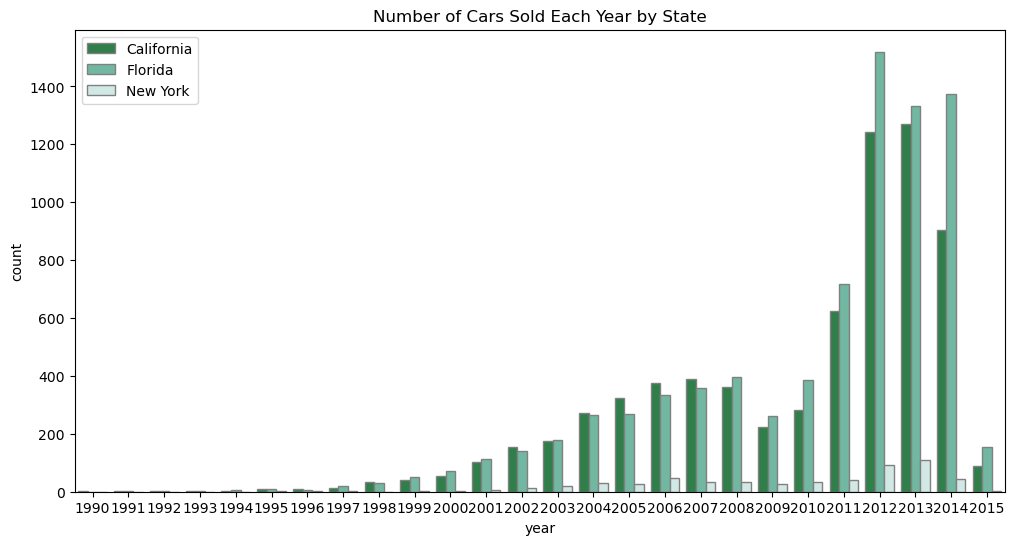

In [214]:
states_to_include = ['ca', 'ny', 'fl']  # Add the states you want to include
filtered_cars = cars[cars['state'].isin(states_to_include)]

plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='state', data=filtered_cars, palette='BuGn_r', edgecolor='gray')
plt.title('Number of Cars Sold Each Year by State')
plt.legend(['California','Florida','New York'])

Till 2008, California had the highest sale, since then Florida took the first place.

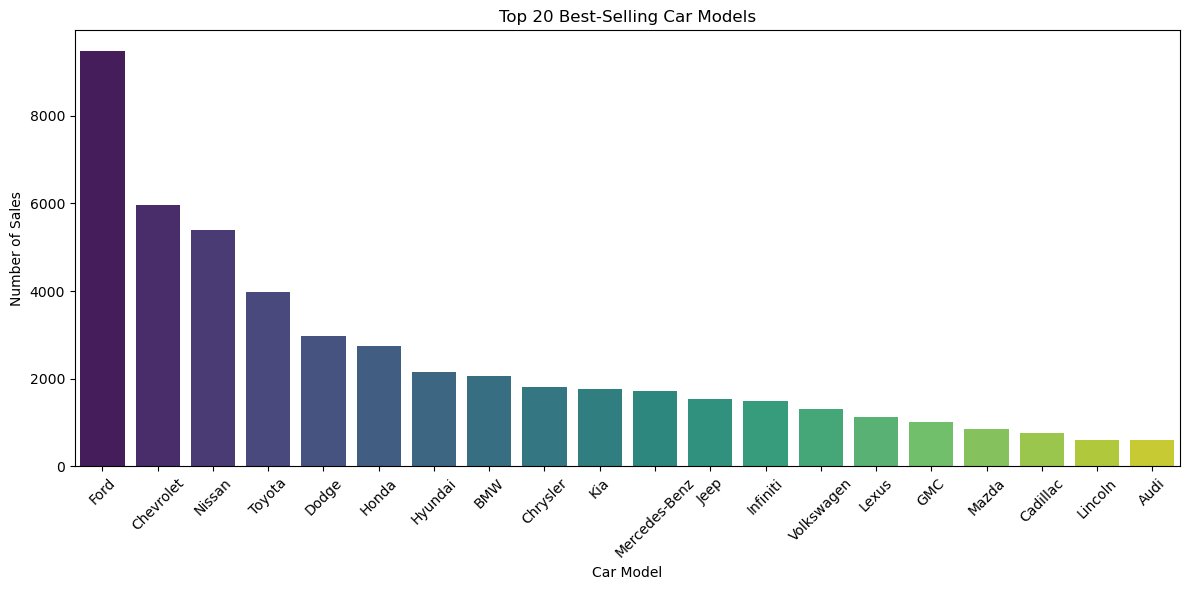

In [215]:
# Assuming 'cars' is your DataFrame and it has a 'model' column
top_20_models = cars['make'].value_counts().nlargest(20).index
top_20_cars = cars[cars['make'].isin(top_20_models)]

plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=top_20_cars, palette='viridis', order=top_20_models)
plt.xticks(rotation=45)
plt.title('Top 20 Best-Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()


<Axes: xlabel='day_of_week', ylabel='count'>

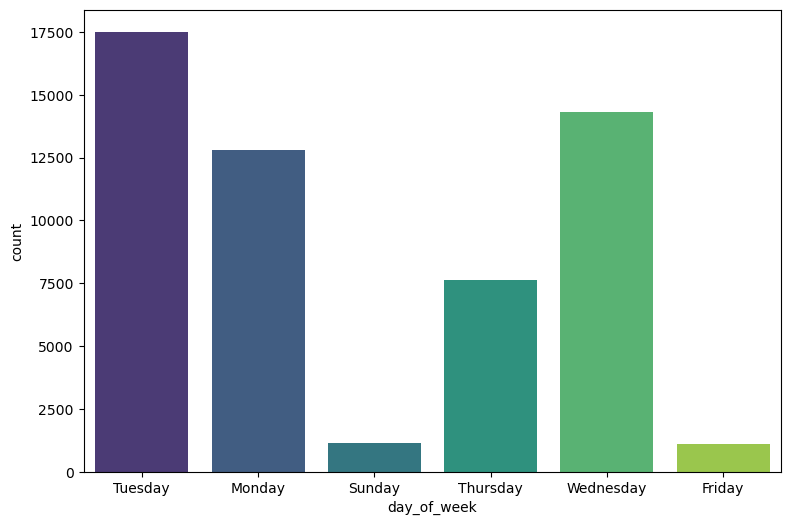

In [216]:
plt.figure(figsize=(9, 6))
sns.countplot(x='day_of_week',data=cars,palette='viridis')

The sales are highest on Tuesday but important point is Sundays and Fridays have the least sale by a great margin.
The possible reason for Sundays is, it is a religious day for Christians and market is closed in most of the states.

Friday is surprising, may be they can give special offers on Fridays to boost sale, like the Black Friday Sale.

<Axes: xlabel='sale_month', ylabel='count'>

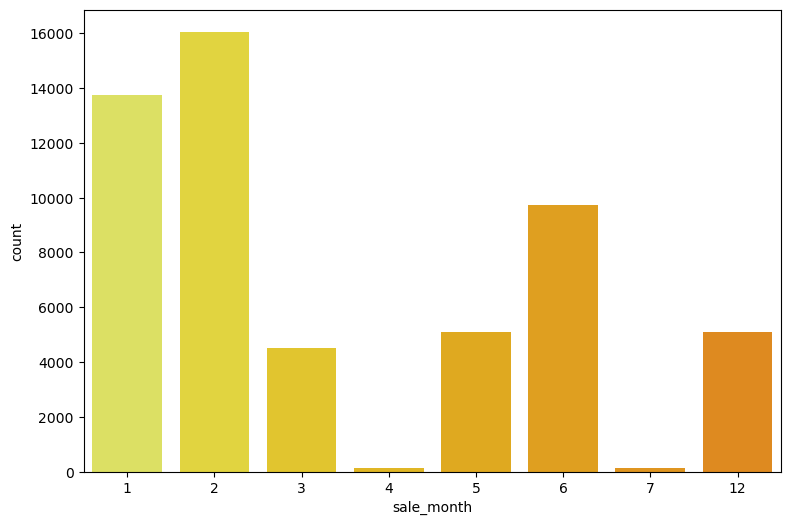

In [217]:
plt.figure(figsize=(9, 6))
sns.countplot(x='sale_month',data=cars,palette='Wistia')

January and February have the most sales whereas April and July have the least.

In [218]:
cars.groupby(['make','state'])['sellingprice'].mean().sort_values(ascending=False).head(10)

make         state
Ferrari      fl       125000.000000
             ca       124000.000000
             pa       109000.000000
Bentley      pa       107250.000000
Lamborghini  fl       107000.000000
Bentley      ga       103500.000000
Tesla        fl        69200.000000
Maserati     pa        68000.000000
Bentley      ca        64850.000000
             fl        62266.666667
Name: sellingprice, dtype: float64

<Axes: title={'center': 'Top 10 Most Expensive Brands'}, xlabel='make', ylabel='Avg Selling Price'>

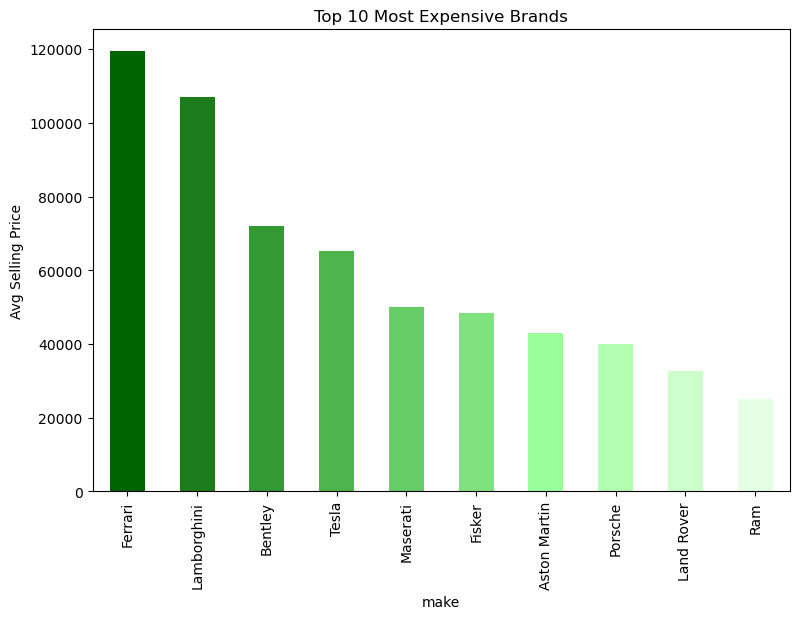

In [219]:
plt.figure(figsize=(9,6))
colors = ['#006400', '#1C7C1C', '#339933', '#4CB64C', '#66CC66', '#7FE27F', '#99FF99', '#B2FFB2', '#CCFFCC', '#E5FFE5']
cars.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=colors,ylabel='Avg Selling Price',title='Top 10 Most Expensive Brands')

Ferrari is the most expensive brand.

<Axes: title={'center': 'Most Expensive Brands By State'}, xlabel='make,state', ylabel='Avg Selling Price'>

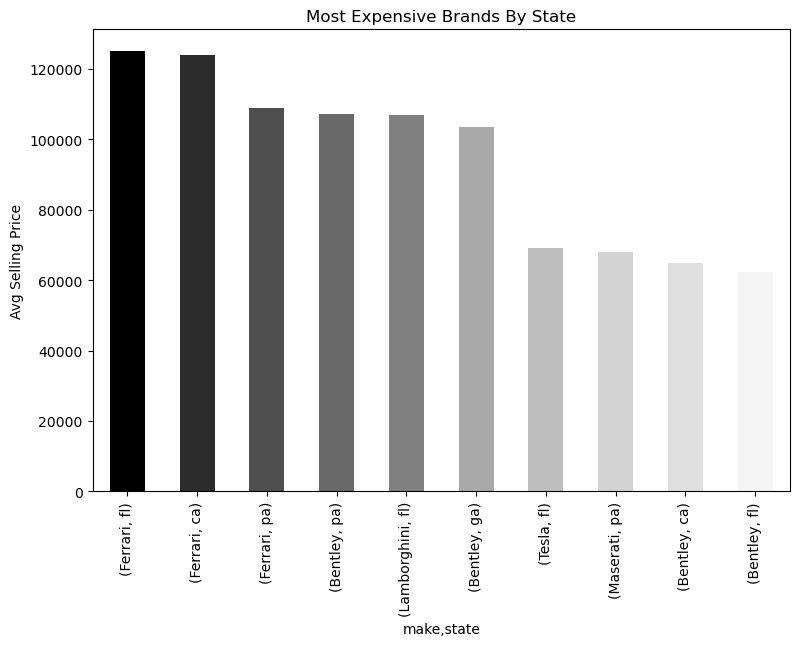

In [220]:
plt.figure(figsize=(9,6))
black_gradient = ['#000000', '#2C2C2C', '#4F4F4F', '#696969', '#808080', '#A9A9A9', '#BEBEBE', '#D3D3D3', '#E0E0E0', '#F5F5F5']
cars.groupby(['make','state'])['sellingprice'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=black_gradient,ylabel='Avg Selling Price',title='Most Expensive Brands By State')

<Axes: title={'center': 'Top 10 Most Expensive Brand Models'}, xlabel='make,model', ylabel='Avg Selling Price'>

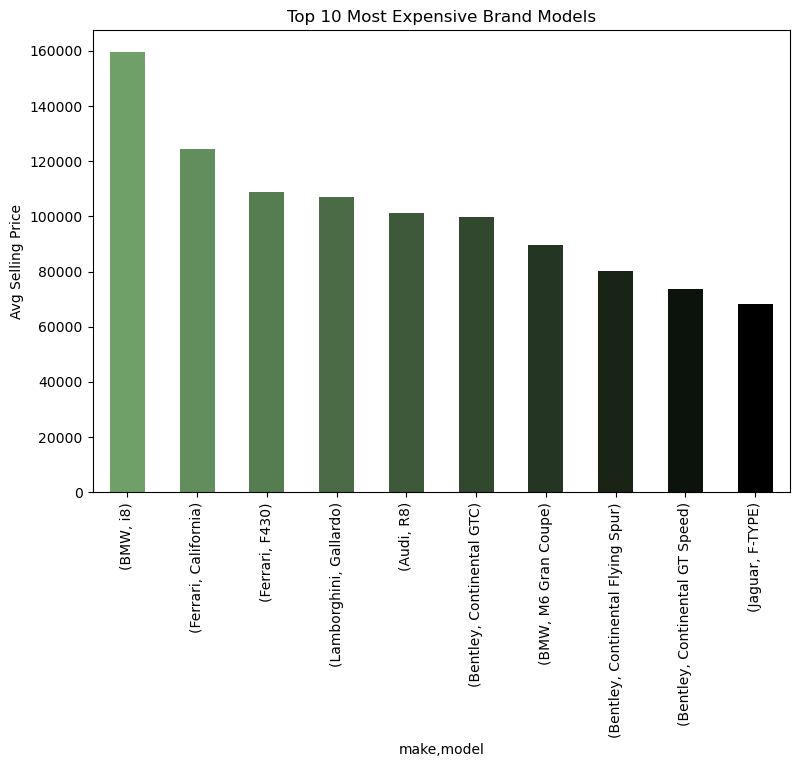

In [221]:
plt.figure(figsize=(9,6))
dark_gradient=['#6fa068','#628e5d','#567d51','#4a6b46','#3e593a','#31472e','#253523','#192417','#0c120c','#000000']
cars.groupby(['make','model'])['sellingprice'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=dark_gradient,ylabel='Avg Selling Price',title='Top 10 Most Expensive Brand Models')

Overall Ferrari is the most expensive brand but BMW i8 is the most expensive car in the US.

<Axes: title={'center': 'Most Expensive Car Body Type'}, xlabel='body'>

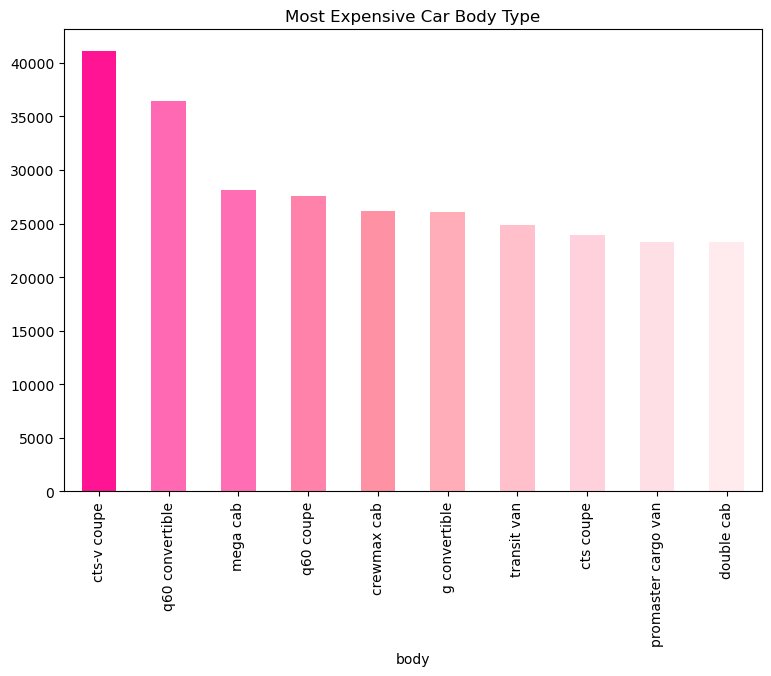

In [222]:
plt.figure(figsize=(9,6))
pink_gradient = ['#FF1493', '#FF69B4', '#FF6EB4', '#FF82AB', '#FF91A4', '#FFAEB9', '#FFC0CB', '#FFD1DC', '#FFDFE6', '#FFEBED']
cars.groupby('body')['sellingprice'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=pink_gradient,title='Most Expensive Car Body Type')

Text(0.5, 1.0, 'Top Selling Cars')

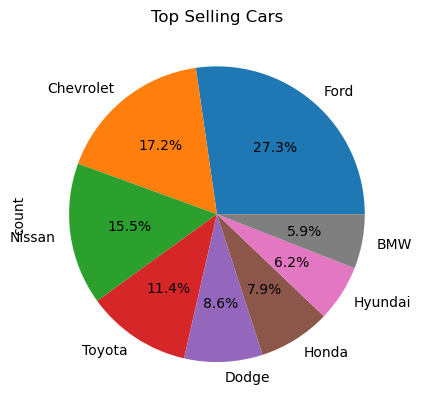

In [223]:
c1=cars['make'].value_counts()
top_make=c1[c1>2000]
top_make.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Selling Cars')

Ford has the highest market share of the US cars market followed by Chevrolet.
In the most expensive brands, these two are nowhere in the top 10. These are the affordable cars.

BMW is the only expensive brand in Top 10.

<Axes: ylabel='count'>

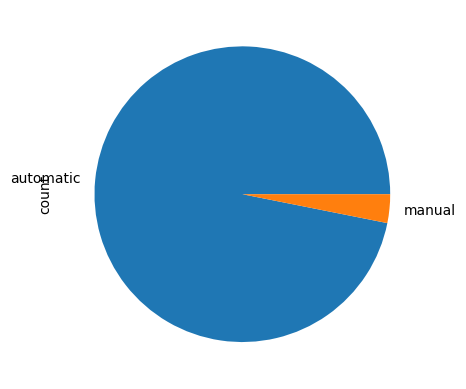

In [224]:
cars['transmission'].value_counts().plot(kind='pie')

The number of manuals cars is minimal.

In [225]:
cars.groupby('state')[['make','model']].agg(lambda x: x.mode()[0])

,make,model
state,,
ab,Ford,F-150
al,Chevrolet,Cruze
az,Chevrolet,Altima
ca,Ford,Altima
co,Ford,Altima
fl,Ford,Altima
ga,Ford,Camry
hi,Ford,Altima
il,Ford,Altima


## Bivariate Analysis

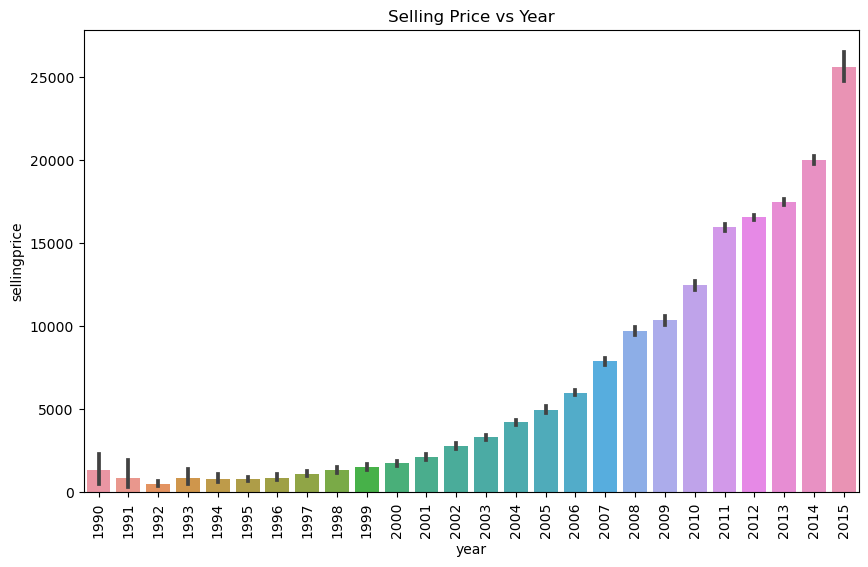

In [226]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='sellingprice',data=cars)
plt.title('Selling Price vs Year')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='day_of_week', ylabel='sellingprice'>

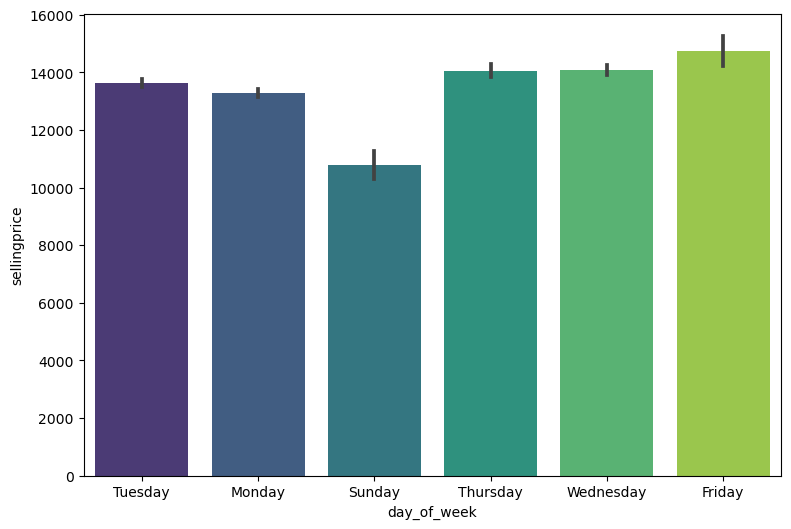

In [227]:
plt.figure(figsize=(9, 6))
sns.barplot(x='day_of_week',y='sellingprice',data=cars,palette='viridis')

<Axes: xlabel='sale_month', ylabel='sellingprice'>

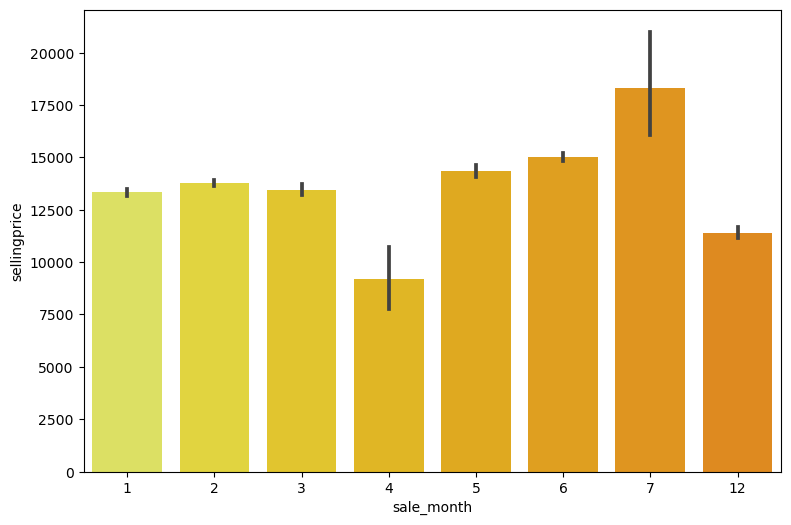

In [228]:
plt.figure(figsize=(9, 6))
sns.barplot(x='sale_month',y='sellingprice',data=cars,palette='Wistia')

In [229]:
model_count=cars['model'].value_counts()
top_model=model_count[model_count>500]
top_model

model
Altima              1914
F-150               1415
Fusion              1336
Camry               1204
Escape              1183
Focus               1058
Accord               917
3 Series             809
Impala               797
Grand Caravan        782
Explorer             771
Corolla              771
Civic                745
G Sedan              740
Malibu               706
Sonata               700
Maxima               665
Cruze                636
Town and Country     629
Edge                 628
Silverado 1500       599
Elantra              596
C-Class              567
Sentra               540
Rogue                523
Equinox              521
Mustang              520
Name: count, dtype: int64

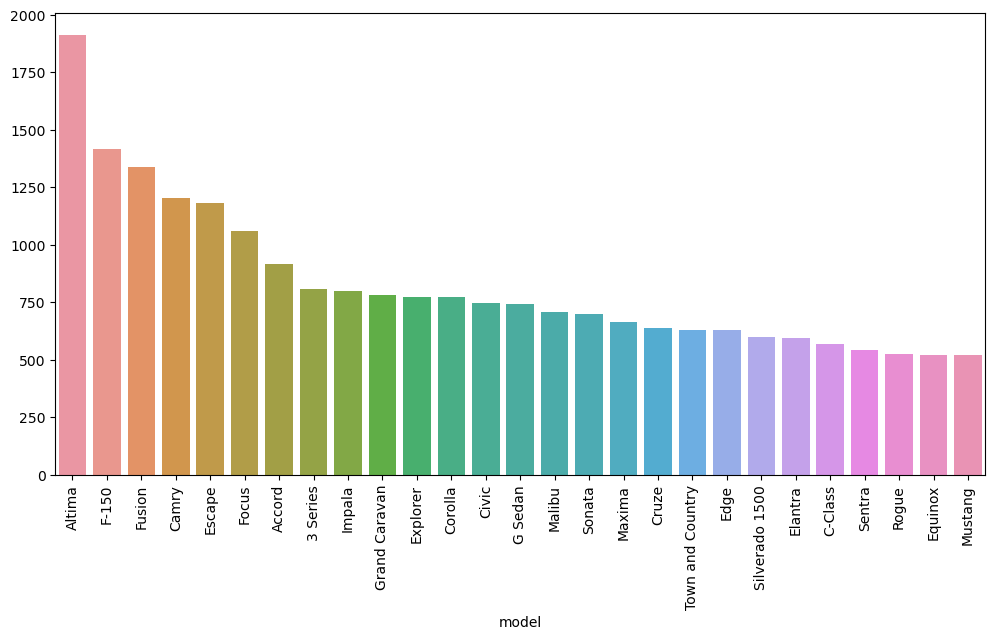

In [230]:
plt.figure(figsize=(12, 6))

sns.barplot(x=top_model.index,y=top_model.values)
plt.xticks(rotation=90)
plt.show()

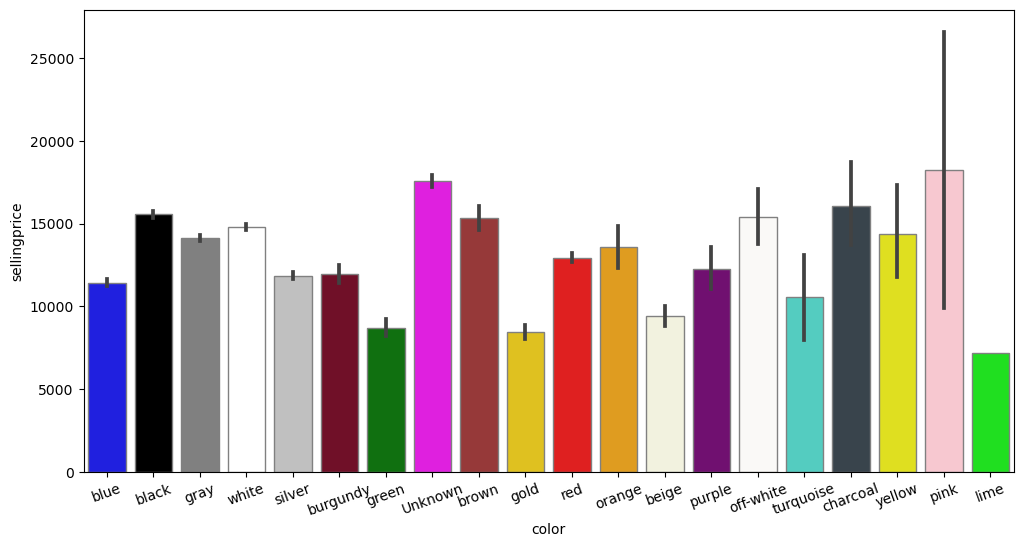

In [231]:
plt.figure(figsize=(12, 6))
color_2 = ['blue', 'black', 'gray', 'white', 'silver', '#800020', 'green',
           'magenta', 'brown', 'gold', 'red', 'orange', 'beige', 'purple',
           '#FAF9F6', 'turquoise', '#36454F', 'yellow', 'pink', 'lime']
sns.barplot(x='color',y='sellingprice',data=cars,palette=color_2,edgecolor='grey')
plt.xticks(rotation=20)
plt.show()

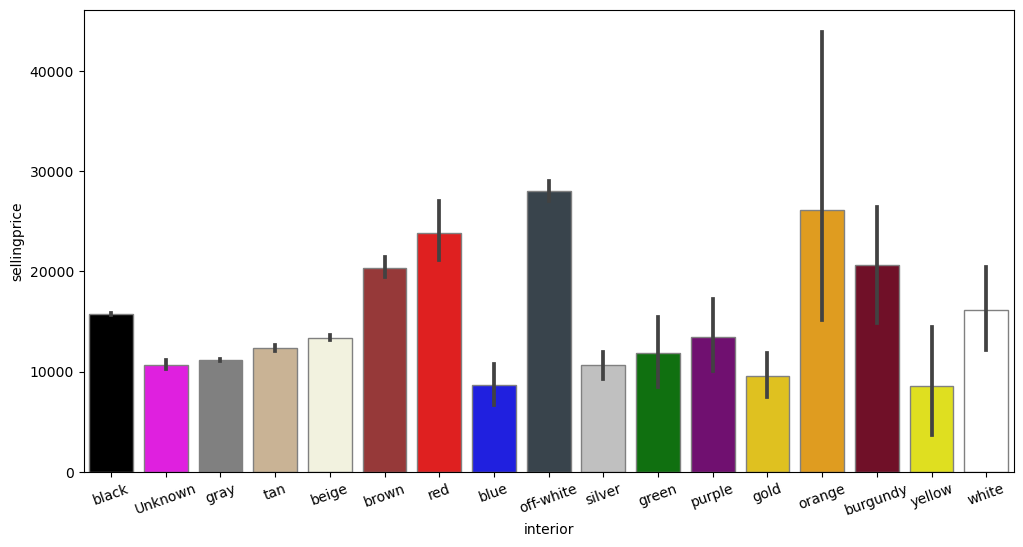

In [232]:
plt.figure(figsize=(12, 6))
color_3 = ['black', 'magenta', 'gray', 'tan', 'beige', 'brown', 'red', 'blue',
       '#36454F', 'silver', 'green', 'purple', 'gold', 'orange',
       '#800020', 'yellow', 'white']
sns.barplot(x='interior',y='sellingprice',data=cars,palette=color_3,edgecolor='grey')
plt.xticks(rotation=20)
plt.show()

<Axes: xlabel='mmr', ylabel='sellingprice'>

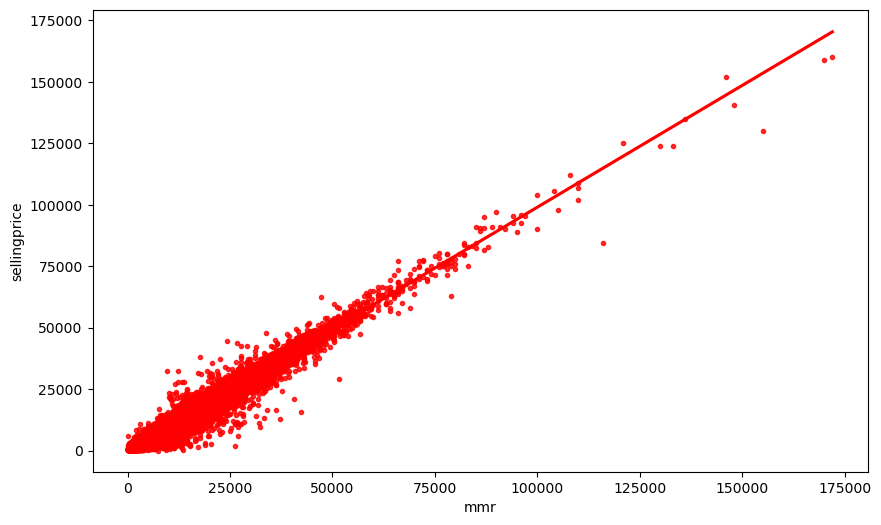

In [233]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mmr',y='sellingprice',data=cars,color='r',marker='.')

In [234]:
cars['age']=cars['sale_year']-cars['year']

C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='sellingprice'>

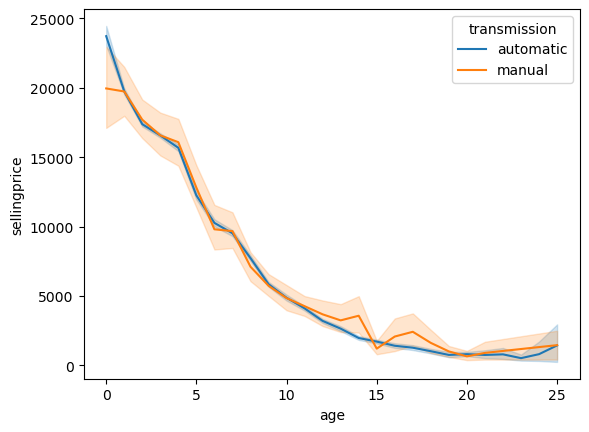

In [235]:
sns.lineplot(x='age',y='sellingprice',hue='transmission',data=cars)

C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='condition', ylabel='sellingprice'>

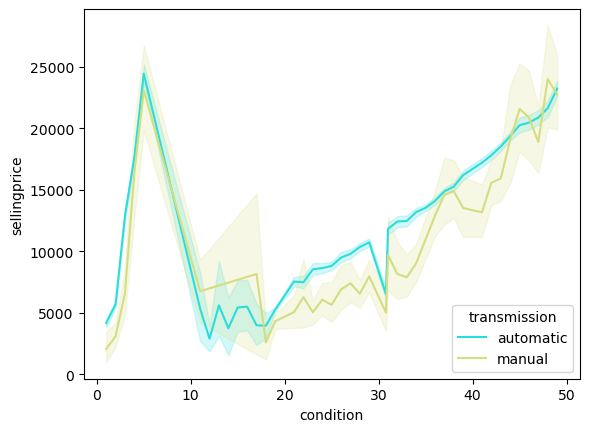

In [236]:
sns.lineplot(x='condition',y='sellingprice',hue='transmission',data=cars,palette='rainbow')

C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaln\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


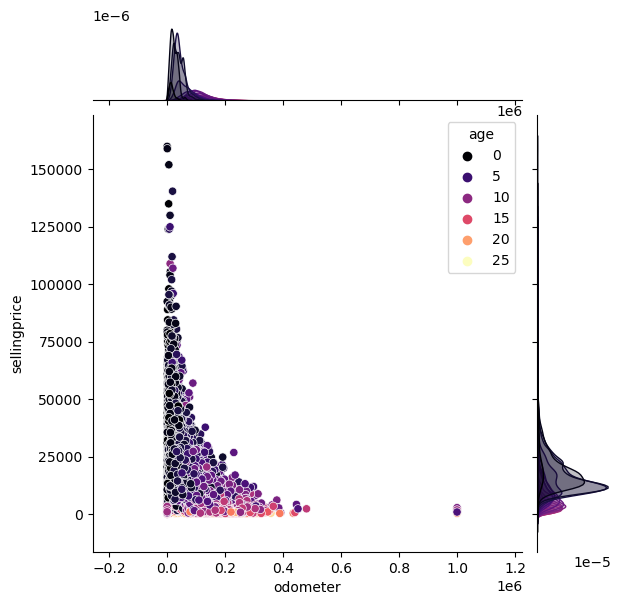

In [237]:
sns.jointplot(x='odometer',y='sellingprice',hue='age',data=cars,palette='magma')

## Checking Outliers

In [ ]:
num_col

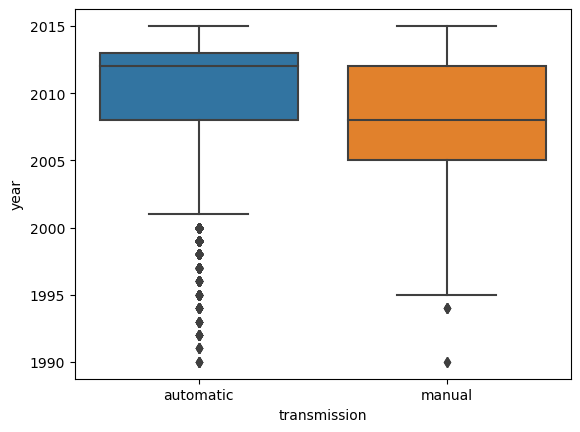

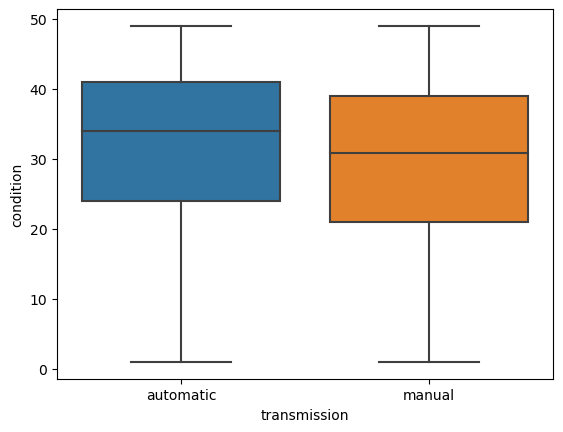

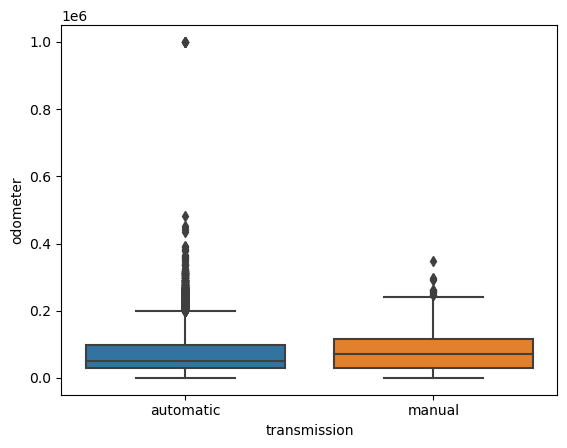

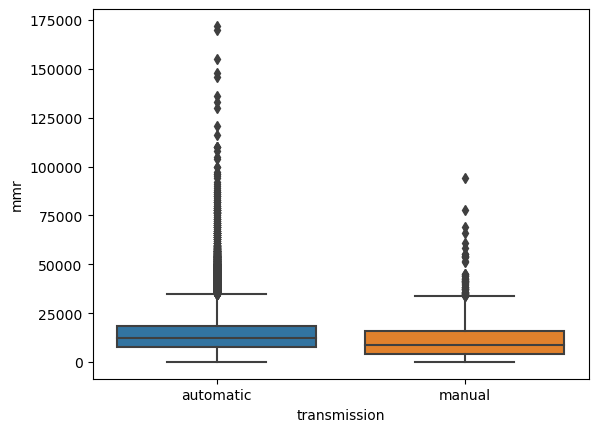

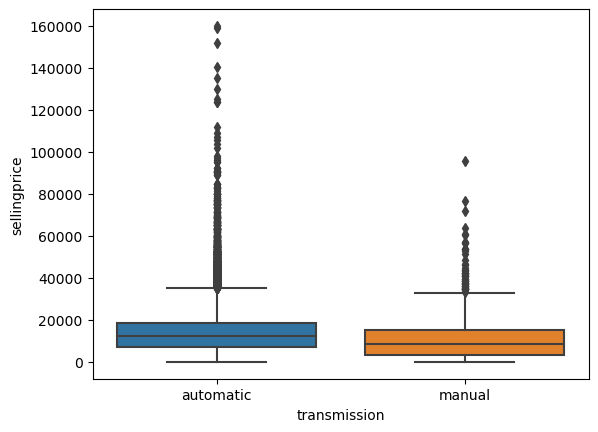

In [238]:
num_col=cars.select_dtypes(include='number')
for i in num_col.iloc[:,0:5]:
    sns.boxplot(x='transmission',y=i,data=cars)
    plt.show()    

## Removing Outliers

In [239]:
num_col=cars.select_dtypes(include='number')
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 - Q1

cars_cleaned = cars[~((num_col < (Q1 - 1.5 * IQR)) |(num_col > (Q3 + 1.5 * IQR))).any(axis=1)]

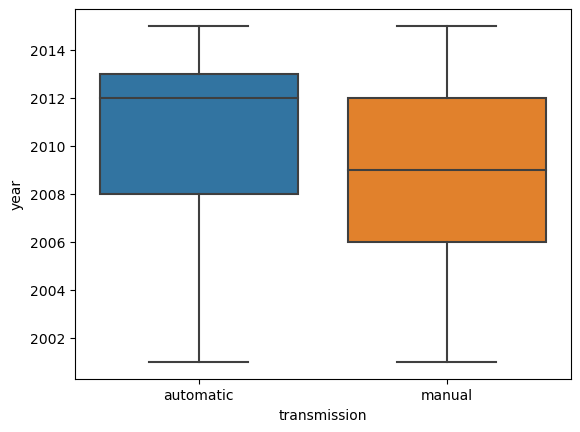

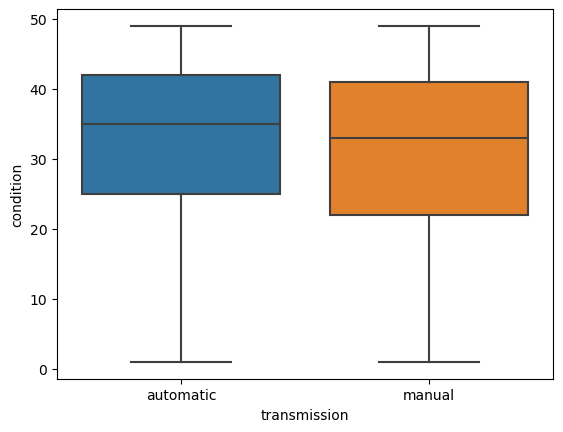

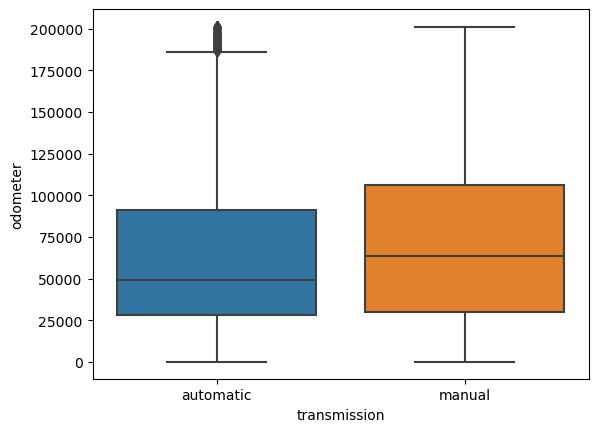

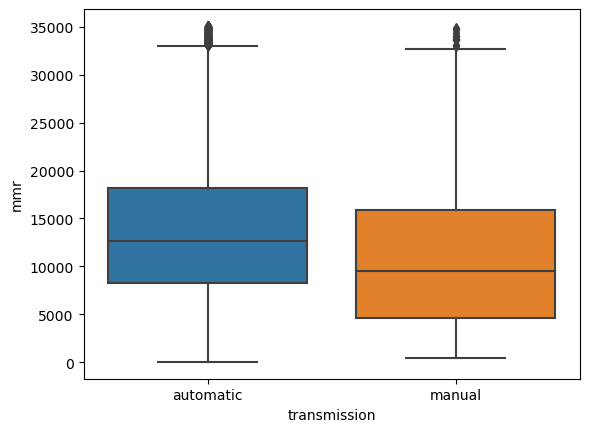

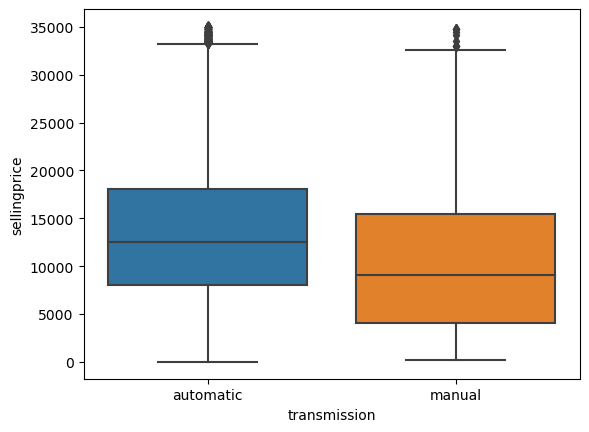

In [240]:
num_col=cars.select_dtypes(include='number')
for i in num_col.iloc[:,0:5]:
    sns.boxplot(x='transmission',y=i,data=cars_cleaned)
    plt.show()    

In [241]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46097 entries, 1 to 55883
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46097 non-null  int64  
 1   make          46097 non-null  object 
 2   model         46097 non-null  object 
 3   trim          46097 non-null  object 
 4   body          46097 non-null  object 
 5   transmission  46097 non-null  object 
 6   state         46097 non-null  object 
 7   condition     46097 non-null  float64
 8   odometer      46097 non-null  float64
 9   color         46097 non-null  object 
 10  interior      46097 non-null  object 
 11  seller        46097 non-null  object 
 12  mmr           46097 non-null  float64
 13  sellingprice  46097 non-null  float64
 14  sale_year     46097 non-null  int32  
 15  sale_month    46097 non-null  int32  
 16  sale_day      46097 non-null  int32  
 17  day_of_week   46097 non-null  object 
 18  age           46097 non-null  i

In [242]:
#cars_cleaned.reset_index(inplace=True)
cars_cleaned.drop(['sale_year','sale_month','sale_day'],axis=1,inplace=True)

C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2408757434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned.drop(['sale_year','sale_month','sale_day'],axis=1,inplace=True)


## Correlation Heatmap

In [243]:
numeric_col=cars_cleaned.select_dtypes(include='number')

<Axes: >

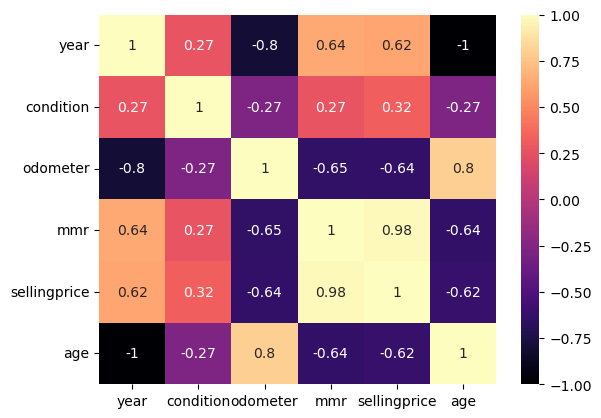

In [244]:
sns.heatmap(numeric_col.corr(),cmap='magma',annot=True)

In [245]:
numeric_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46097 entries, 1 to 55883
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46097 non-null  int64  
 1   condition     46097 non-null  float64
 2   odometer      46097 non-null  float64
 3   mmr           46097 non-null  float64
 4   sellingprice  46097 non-null  float64
 5   age           46097 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 2.5 MB


In [246]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46097 entries, 1 to 55883
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46097 non-null  int64  
 1   make          46097 non-null  object 
 2   model         46097 non-null  object 
 3   trim          46097 non-null  object 
 4   body          46097 non-null  object 
 5   transmission  46097 non-null  object 
 6   state         46097 non-null  object 
 7   condition     46097 non-null  float64
 8   odometer      46097 non-null  float64
 9   color         46097 non-null  object 
 10  interior      46097 non-null  object 
 11  seller        46097 non-null  object 
 12  mmr           46097 non-null  float64
 13  sellingprice  46097 non-null  float64
 14  day_of_week   46097 non-null  object 
 15  age           46097 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 6.0+ MB


In [247]:
cars_cleaned.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,day_of_week,age
1,2011,Infiniti,G Sedan,G37x,g sedan,automatic,tn,43.0,36724.0,black,Unknown,nissan infiniti lt,17950.0,18000.0,Tuesday,4
2,2012,Toyota,RAV4,Base,suv,automatic,oh,26.0,22142.0,blue,gray,toyota financial services,15450.0,14600.0,Monday,3
3,2014,Dodge,Avenger,SE,sedan,automatic,mn,45.0,11893.0,blue,black,capital one auto finance,12200.0,13500.0,Tuesday,1
4,2011,Ford,Focus,SEL,sedan,automatic,nc,47.0,72731.0,gray,gray,parkway ford lincoln,8025.0,8600.0,Monday,4
5,2013,Hyundai,Elantra,GLS,sedan,automatic,mo,34.0,33141.0,white,tan,avis corporation,10600.0,10600.0,Monday,2


### Checking the Market Share

In [248]:
count=cars_cleaned['model'].value_counts()
a=count/sum(count)*100
a.head(10)

model
Altima           3.731262
Fusion           2.711673
F-150            2.614053
Escape           2.358071
Camry            2.201879
Focus            2.086904
Impala           1.566262
Grand Caravan    1.559754
Accord           1.494674
G Sedan          1.481658
Name: count, dtype: float64

In [249]:
count=cars_cleaned['trim'].value_counts()
a=count/sum(count)*100
a.head(10)

trim
Base       9.564614
SE         8.388832
LX         3.774649
Limited    3.572901
XLT        3.149880
LT         3.139033
LE         2.394950
LS         2.375426
GLS        2.347224
Touring    2.258281
Name: count, dtype: float64

In [250]:
count1=cars_cleaned['state'].value_counts()
a=count1/sum(count1)*100
a.head(10)

state
fl    14.899017
ca    11.723106
pa    10.260971
tx     8.432219
ga     6.423412
nj     5.189058
il     4.447144
oh     4.028462
tn     3.789834
nc     3.635811
Name: count, dtype: float64

In [251]:
count=cars_cleaned['interior'].value_counts()
count/sum(count)*100

interior
black        46.000824
gray         31.730915
beige        10.449704
tan           7.499403
Unknown       2.086904
brown         1.327635
silver        0.214765
red           0.186563
blue          0.145346
off-white     0.082435
gold          0.065080
purple        0.052064
white         0.049895
green         0.041217
burgundy      0.034709
orange        0.028201
yellow        0.004339
Name: count, dtype: float64

## Grouping Features Based on Market Share

In [252]:
# Calculate the count and percentage for each 'make'
count = cars_cleaned['make'].value_counts()
perc = count / count.sum() * 100

# Map the percentages back to the original DataFrame
cars_cleaned['make_perc'] = cars_cleaned['make'].map(perc)

# Categorize based on the percentage
cars_cleaned['make'] = np.where(cars_cleaned['make_perc'] < 1, 'Low', 
                                np.where(cars_cleaned['make_perc'] <= 10, 'Moderate', 
                                         cars_cleaned['make']))

# Drop the helper column if not needed
cars_cleaned.drop('make_perc', axis=1, inplace=True)


C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\4244822305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['make_perc'] = cars_cleaned['make'].map(perc)
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\4244822305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['make'] = np.where(cars_cleaned['make_perc'] < 1, 'Low',
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\4244822305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [253]:
# Calculate the count and percentage for each 'make'
count = cars_cleaned['model'].value_counts()
perc = count / count.sum() * 100

# Map the percentages back to the original DataFrame
cars_cleaned['model_perc'] = cars_cleaned['model'].map(perc)

# Categorize based on the percentage
cars_cleaned['model'] = np.where(cars_cleaned['model_perc'] < 1, 'Low', 
                                np.where(cars_cleaned['model_perc'] <= 2, 'Moderate', 
                                         cars_cleaned['model']))

# Drop the helper column if not needed
cars_cleaned.drop('model_perc', axis=1, inplace=True)


C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\1790831083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['model_perc'] = cars_cleaned['model'].map(perc)
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\1790831083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['model'] = np.where(cars_cleaned['model_perc'] < 1, 'Low',
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\1790831083.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [254]:
# Calculate the count and percentage for each 'make'
count = cars_cleaned['trim'].value_counts()
perc = count / count.sum() * 100

# Map the percentages back to the original DataFrame
cars_cleaned['trim_perc'] = cars_cleaned['trim'].map(perc)

# Categorize based on the percentage
cars_cleaned['trim'] = np.where(cars_cleaned['trim_perc'] < 1, 'Low', 
                                np.where(cars_cleaned['trim_perc'] <= 3, 'Moderate', 
                                         cars_cleaned['trim']))

# Drop the helper column if not needed
cars_cleaned.drop('trim_perc', axis=1, inplace=True)


C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2807600416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['trim_perc'] = cars_cleaned['trim'].map(perc)
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2807600416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['trim'] = np.where(cars_cleaned['trim_perc'] < 1, 'Low',
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2807600416.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [255]:
# Calculate the count and percentage for each 'make'
count = cars_cleaned['body'].value_counts()
perc = count / count.sum() * 100

# Map the percentages back to the original DataFrame
cars_cleaned['body_perc'] = cars_cleaned['body'].map(perc)

# Categorize based on the percentage
cars_cleaned['body'] = np.where(cars_cleaned['body_perc'] < 1, 'Low', 
                                np.where(cars_cleaned['body_perc'] <= 10, 'Moderate', 
                                         cars_cleaned['body']))

# Drop the helper column if not needed
cars_cleaned.drop('body_perc', axis=1, inplace=True)


C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2750543873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['body_perc'] = cars_cleaned['body'].map(perc)
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2750543873.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['body'] = np.where(cars_cleaned['body_perc'] < 1, 'Low',
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\2750543873.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [256]:
# Calculate the count and percentage for each 'make'
count = cars_cleaned['color'].value_counts()
perc = count / count.sum() * 100

# Map the percentages back to the original DataFrame
cars_cleaned['color_perc'] = cars_cleaned['color'].map(perc)

# Categorize based on the percentage
cars_cleaned['color'] = np.where(cars_cleaned['color_perc'] < 4, 'Low', 
                                np.where(cars_cleaned['color_perc'] <= 10, 'Moderate', 
                                         cars_cleaned['color']))

# Drop the helper column if not needed
cars_cleaned.drop('color_perc', axis=1, inplace=True)


C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\771880924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['color_perc'] = cars_cleaned['color'].map(perc)
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\771880924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['color'] = np.where(cars_cleaned['color_perc'] < 4, 'Low',
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\771880924.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [257]:
# Calculate the count and percentage for each 'make'
count = cars_cleaned['interior'].value_counts()
perc = count / count.sum() * 100

# Map the percentages back to the original DataFrame
cars_cleaned['interior_perc'] = cars_cleaned['interior'].map(perc)

# Categorize based on the percentage
cars_cleaned['interior'] = np.where(cars_cleaned['interior_perc'] < 1, 'Low', 
                                np.where(cars_cleaned['interior_perc'] <= 10, 'Moderate', 
                                         cars_cleaned['interior']))

# Drop the helper column if not needed
cars_cleaned.drop('interior_perc', axis=1, inplace=True)


C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\242570905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['interior_perc'] = cars_cleaned['interior'].map(perc)
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\242570905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned['interior'] = np.where(cars_cleaned['interior_perc'] < 1, 'Low',
C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\242570905.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [258]:
cars_cleaned.sample(10)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,day_of_week,age
31610,2011,Moderate,Low,Moderate,suv,automatic,ma,26.0,76065.0,Low,gray,capital one auto finance,12750.0,11200.0,Monday,4
34413,2013,Moderate,Low,Limited,sedan,automatic,mn,48.0,13614.0,Moderate,black,chrysler capital,14600.0,15200.0,Wednesday,2
54932,2006,Moderate,Low,Base,Moderate,automatic,wi,27.0,101467.0,Moderate,gray,arlington hgts chry dod jeep,4925.0,5200.0,Tuesday,9
9666,2012,Nissan,Altima,Moderate,sedan,automatic,fl,39.0,22745.0,silver,black,nissan-infiniti lt,12300.0,11800.0,Monday,3
7260,2013,Moderate,Moderate,Moderate,sedan,automatic,tx,48.0,37127.0,white,Moderate,enterprise vehicle exchange/dfw airport,12300.0,12500.0,Tuesday,2
15758,2006,Moderate,Low,Base,Moderate,automatic,tn,19.0,114170.0,silver,gray,santander consumer,2300.0,2500.0,Monday,9
53891,2008,Moderate,Low,Low,sedan,automatic,ca,35.0,112183.0,Moderate,black,walters auto sales/service inc,9650.0,9300.0,Tuesday,7
22996,2011,Moderate,Low,Low,sedan,automatic,pa,33.0,44660.0,Moderate,black,fiserv/usb dealer services northstar exchange,19250.0,18000.0,Thursday,4
23729,2012,Ford,Fusion,SE,sedan,automatic,tn,46.0,22753.0,Moderate,black,ford motor credit company llc,12400.0,13000.0,Tuesday,3
15675,2013,Moderate,Moderate,Moderate,sedan,automatic,mn,37.0,13827.0,gray,Moderate,hyundai motor finance,12550.0,12000.0,Tuesday,2


## Scaling

In [259]:
from sklearn.preprocessing import StandardScaler

In [260]:
scaler=StandardScaler()

In [261]:
num_features=['condition', 'odometer', 'mmr', 'age']

In [262]:
cars_cleaned[num_features]=scaler.fit_transform(cars_cleaned[num_features])

C:\Users\shaln\AppData\Local\Temp\ipykernel_6616\1798594135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned[num_features]=scaler.fit_transform(cars_cleaned[num_features])


In [263]:
cars_cleaned.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,day_of_week,age
1,2011,Moderate,Moderate,Low,Moderate,automatic,tn,0.908134,-0.586543,black,Moderate,nissan infiniti lt,0.608586,18000.0,Tuesday,-0.140915
2,2012,Moderate,Low,Base,suv,automatic,oh,-0.394659,-0.915142,Moderate,gray,toyota financial services,0.269211,14600.0,Monday,-0.437918
3,2014,Moderate,Low,SE,sedan,automatic,mn,1.061404,-1.146099,Moderate,black,capital one auto finance,-0.171977,13500.0,Tuesday,-1.031924
4,2011,Ford,Focus,Moderate,sedan,automatic,nc,1.214674,0.224859,gray,gray,parkway ford lincoln,-0.738733,8600.0,Monday,-0.140915
5,2013,Moderate,Moderate,Moderate,sedan,automatic,mo,0.218420,-0.667284,white,Moderate,avis corporation,-0.389177,10600.0,Monday,-0.734921


## Train Test Split

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
X=cars_cleaned.drop(['sellingprice','year','state','seller','mmr'],axis=1)
y=cars_cleaned['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Encoding

In [266]:
from sklearn.preprocessing import OneHotEncoder

In [267]:
ohe=OneHotEncoder(drop='first',sparse_output=False)

In [268]:
# Define the categorical features
cat_features = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'day_of_week']

# Fit and transform the X_train categorical features
X_train_encoded = ohe.fit_transform(X_train[cat_features])

# Transform the X_test categorical features
X_test_encoded = ohe.transform(X_test[cat_features])

# Convert the numpy array to a DataFrame with appropriate column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(cat_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(cat_features))

# Reset the index to match with the original DataFrames
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# Drop the original categorical columns from the training and test sets
X_train_new = X_train.drop(cat_features, axis=1)
X_test_new = X_test.drop(cat_features, axis=1)

# Concatenate the new encoded columns with the rest of the DataFrame
X_train_new = pd.concat([X_train_new, X_train_encoded_df], axis=1)
X_test_new = pd.concat([X_test_new, X_test_encoded_df], axis=1)


# Model Fitting

## Linear Regression Model

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
model_lin=LinearRegression()

In [271]:
model_lin.fit(X_train_new,y_train)

LinearRegression()

In [272]:
y_pred_lin=model_lin.predict(X_test_new)

In [273]:
# 📊 Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred_lin)
mae = mean_absolute_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lin)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3421.92
RMSE: 4544.66
R² Score: 0.63


In [274]:
from sklearn.metrics import r2_score,mean_squared_error

In [275]:
r2_score(y_test,y_pred)

-3.1458214580131285

In [276]:
mean_squared_error(y_test,y_pred)

233323361.23919028

## Decision Tree Regressor

In [277]:
from sklearn.tree import DecisionTreeRegressor

In [278]:
dtree=DecisionTreeRegressor(max_depth=10,min_samples_split=10)

In [279]:
dtree.fit(X_train_new,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [280]:
y_predict=dtree.predict(X_test_new)

In [281]:
# 📊 Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 3063.73
RMSE: 4347.53
R² Score: 0.66


In [282]:
y_pr=dtree.predict(X_train_new)

In [283]:
r2_score(y_train,y_pr)

0.7258811683059305

In [284]:
r2_score(y_test,y_predict)

0.6641567704976938

## Random Forest Classifier

In [285]:
from sklearn.ensemble import RandomForestRegressor

In [286]:
mod_l=RandomForestRegressor(n_estimators=200,min_samples_split=12,max_leaf_nodes=8)

In [287]:
mod_l.fit(X_train_new,y_train)

RandomForestRegressor(max_leaf_nodes=8, min_samples_split=12, n_estimators=200)

In [288]:
y_prRF=mod_l.predict(X_test_new)

In [289]:
r2_score(y_test,y_prRF)

0.5168713664083652

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=mod_l, 
                           param_grid=param_grid, 
                           cv=5,                       # 5-fold cross-validation
                           n_jobs=-1,                  # Use all available cores
                           verbose=2, 
                           scoring='r2')               # Use R^2 as the scoring metric

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


ValueError: 
All the 1620 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaln\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaln\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Moderate'


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import pickle  # 🔐 For saving scaler

## ANN

In [290]:
model = Sequential([
    Dense(64, activation='LeakyReLU', input_shape=(X_train_new.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='LeakyReLU'),
    Dropout(0.2),
    Dense(1)  # No activation, since it's regression
])


In [291]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [292]:
# ⏱️ Step 5: Set Up Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
#checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [293]:
# 🚀 Step 6: Train the Model
history = model.fit(
    X_train_new, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=early_stop,
    verbose=1
)

Epoch 1/200
773/773 [==============================] - 3s 3ms/step - loss: 146876592.0000 - mae: 9650.8506 - val_loss: 33720628.0000 - val_mae: 4344.1855
Epoch 2/200
773/773 [==============================] - 2s 3ms/step - loss: 30652276.0000 - mae: 4251.8037 - val_loss: 25219352.0000 - val_mae: 3851.8901
Epoch 3/200
773/773 [==============================] - 2s 3ms/step - loss: 26905304.0000 - mae: 3951.1208 - val_loss: 23016170.0000 - val_mae: 3637.5029
Epoch 4/200
773/773 [==============================] - 2s 3ms/step - loss: 25243394.0000 - mae: 3821.2849 - val_loss: 22105090.0000 - val_mae: 3556.0449
Epoch 5/200
773/773 [==============================] - 2s 3ms/step - loss: 24787030.0000 - mae: 3771.5437 - val_loss: 21690414.0000 - val_mae: 3509.3259
Epoch 6/200
773/773 [==============================] - 2s 3ms/step - loss: 24101946.0000 - mae: 3715.5908 - val_loss: 21392008.0000 - val_mae: 3477.4294
Epoch 7/200
773/773 [==============================] - 2s 3ms/step - loss: 237497

773/773 [==============================] - 2s 3ms/step - loss: 21606932.0000 - mae: 3445.2034 - val_loss: 19542670.0000 - val_mae: 3226.6667
Epoch 55/200
773/773 [==============================] - 2s 3ms/step - loss: 21691358.0000 - mae: 3448.7783 - val_loss: 19421618.0000 - val_mae: 3226.3694
Epoch 56/200
773/773 [==============================] - 2s 3ms/step - loss: 21547150.0000 - mae: 3442.0432 - val_loss: 19460788.0000 - val_mae: 3227.1235
Epoch 57/200
773/773 [==============================] - 2s 3ms/step - loss: 21480518.0000 - mae: 3436.9668 - val_loss: 19426142.0000 - val_mae: 3218.8772
Epoch 58/200
773/773 [==============================] - 2s 3ms/step - loss: 21753068.0000 - mae: 3442.4780 - val_loss: 19366434.0000 - val_mae: 3223.6897
Epoch 59/200
773/773 [==============================] - 2s 3ms/step - loss: 21556682.0000 - mae: 3437.1233 - val_loss: 19378250.0000 - val_mae: 3218.4397
Epoch 60/200
773/773 [==============================] - 2s 3ms/step - loss: 21561732.0000

773/773 [==============================] - 2s 3ms/step - loss: 21261662.0000 - mae: 3396.1799 - val_loss: 18986264.0000 - val_mae: 3167.8035
Epoch 108/200
773/773 [==============================] - 2s 3ms/step - loss: 21099604.0000 - mae: 3388.2222 - val_loss: 18994810.0000 - val_mae: 3168.5972
Epoch 109/200
773/773 [==============================] - 2s 3ms/step - loss: 21222288.0000 - mae: 3401.7546 - val_loss: 19067164.0000 - val_mae: 3162.3660
Epoch 110/200
773/773 [==============================] - 2s 3ms/step - loss: 21111320.0000 - mae: 3386.2664 - val_loss: 18940846.0000 - val_mae: 3173.7954
Epoch 111/200
773/773 [==============================] - 2s 3ms/step - loss: 21135074.0000 - mae: 3388.4563 - val_loss: 18983452.0000 - val_mae: 3165.5801
Epoch 112/200
773/773 [==============================] - 2s 3ms/step - loss: 21204564.0000 - mae: 3391.9248 - val_loss: 19006248.0000 - val_mae: 3160.0488
Epoch 113/200
773/773 [==============================] - 2s 3ms/step - loss: 2113726

Epoch 160/200
773/773 [==============================] - 2s 3ms/step - loss: 20550518.0000 - mae: 3328.3047 - val_loss: 18463152.0000 - val_mae: 3100.3120
Epoch 161/200
773/773 [==============================] - 2s 3ms/step - loss: 20736590.0000 - mae: 3340.9573 - val_loss: 18382860.0000 - val_mae: 3099.4641
Epoch 162/200
773/773 [==============================] - 2s 3ms/step - loss: 20665916.0000 - mae: 3343.1924 - val_loss: 18423106.0000 - val_mae: 3091.5427
Epoch 163/200
773/773 [==============================] - 2s 3ms/step - loss: 20579372.0000 - mae: 3332.6880 - val_loss: 18380236.0000 - val_mae: 3094.2043
Epoch 164/200
773/773 [==============================] - 2s 3ms/step - loss: 20615948.0000 - mae: 3342.0417 - val_loss: 18353138.0000 - val_mae: 3099.7803
Epoch 165/200
773/773 [==============================] - 2s 3ms/step - loss: 20878810.0000 - mae: 3360.1646 - val_loss: 18342186.0000 - val_mae: 3094.8738
Epoch 166/200
773/773 [==============================] - 2s 3ms/step -

In [294]:
# 🔮 Step 7: Make Predictions
y_pred = model.predict(X_test_new).flatten()

476/476 [==============================] - 1s 2ms/step


In [295]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [296]:
# 📊 Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 3054.96
RMSE: 4274.60
R² Score: 0.68


In [297]:
# r2_score is already computed
n = X_test_new.shape[0]   # number of samples
p = X_test_new.shape[1]   # number of features

adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted R² Score: {adjusted_r2:.3f}")


Adjusted R² Score: 0.674


In [298]:
y_test.describe()

count    15213.000000
mean     13306.223099
std       7502.190518
min        150.000000
25%       7900.000000
50%      12500.000000
75%      18100.000000
max      35000.000000
Name: sellingprice, dtype: float64